In [1]:
import numpy as np
import scipy as sp
import scipy.stats as stats
import scipy.special as special
import pandas as pd
import chaospy as cp
import sys

%matplotlib inline
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns

sns.set_style("ticks")#'whitegrid')#
#sns.set_context("talk")
sns.set_style({'axes.linewidth':0.5,
               'xtick.direction': u'in',
               'xtick.major.size': 1.,
               'xtick.minor.size': 0.5,
               'ytick.direction': u'in',               
               'ytick.major.size': 1.,
               'ytick.minor.size': 0.5})  




:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [251]:
x = np.linspace(0,1,100)

#y = lambda x: 0.25+(np.cos(4.*np.pi*(x+0.2))*(1.-(x+0.2))**2. +(x+0.2)*1.5)*((x+0.2)<0.5) + ((x+0.2)>=0.5)#*(x+0.7)
y = lambda x: (x-.5) + 0.5

order = 8

dist_x = cp.Uniform()
x_sample = dist_x.sample(size=order, rule='M')
y_sample = y(x_sample) + np.random.normal(scale=0.02,size=len(x_sample))

y_overfit = np.poly1d(np.polyfit(x_sample,y_sample,order))

y_fit = np.poly1d(np.polyfit(x_sample,y_sample,1))

/Users/JPM/OpenMDAO/lib/python2.7/site-packages/numpy/lib/polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


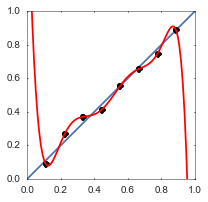

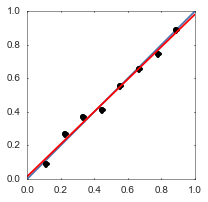

In [252]:
fig = plt.figure(figsize=[3,3])
ax = fig.add_subplot(111)
ax.plot(x,y(x))
ax.plot(x_sample,y_sample,'ok')
ax.plot(x,y_overfit(x),'-r')
ax.set_ylim([0,1.])

fig.savefig('Figures/overfitting.pdf')

fig = plt.figure(figsize=[3,3])
ax = fig.add_subplot(111)
ax.plot(x,y(x))
ax.plot(x_sample,y_sample,'ok')
ax.plot(x,y_fit(x),'-r')
ax.set_ylim([0,1.])

fig.savefig('Figures/overfitting_solved.pdf')


In [253]:
CV = [i for i in range(order) if i!=4]
y_overfit_cv = np.poly1d(np.polyfit(x_sample[CV],y_sample[CV],7))

y_fit_cv = np.poly1d(np.polyfit(x_sample[CV],y_sample[CV],1))

/Users/JPM/OpenMDAO/lib/python2.7/site-packages/numpy/lib/polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


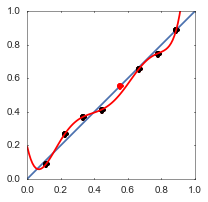

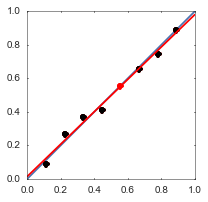

In [254]:
fig = plt.figure(figsize=[3,3])
ax = fig.add_subplot(111)
ax.plot(x,y(x))
ax.plot(x_sample,y_sample,'or')
ax.plot(x_sample[CV],y_sample[CV],'ok')
ax.plot(x,y_overfit_cv(x),'-r')
ax.set_ylim([0,1.])

fig.savefig('Figures/overfitting_CV.pdf')

fig = plt.figure(figsize=[3,3])
ax = fig.add_subplot(111)
ax.plot(x,y(x))
ax.plot(x_sample,y_sample,'or')
ax.plot(x_sample[CV],y_sample[CV],'ok')
ax.plot(x,y_fit_cv(x),'-r')
ax.set_ylim([0,1.])

fig.savefig('Figures/overfitting_solved_CV.pdf')

